#### **Example 5.4:** A mass of 24.5 kg rests on a spring which in turn rests on a rigid foundation. The spring satisfies the nonlinear stiffening relation

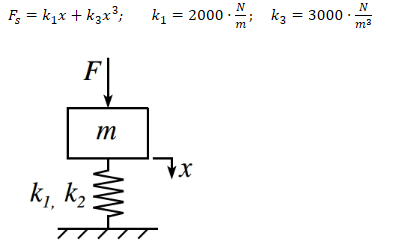


a) Find a nonlinear model

b) Find a linearized model about the nominal point where gravity is the only external force.

c) 
Simulate both the nonlinear and the linear model for an applied for40 of 10 N


See class notes for parts a)-b). 

In [2]:
#import libraries
import numpy as np
from ODE_solvers import RK4
import matplotlib.pyplot as plt
import sympy as sp

#Define symbols to use in symbolic solution:
x_nom = sp.symbols('x_nom')

#Define known values
k1 = 2000
k3 = 3000
m = 24.5
g = 9.81

#Newton's second law on the mass ma=Fin+mg-(k1*x+k3*x**3)
#Find the equilibrium position for the case that Fin_nom =0: 0=0+mg-(k1*x_nom+k3*x_nom**3)
Equil = m*g - (k1*x_nom + k3*x_nom**3)

#Finding the roots of the CP
roots = sp.solve(Equil, x_nom)
sr = [roots[tt].n(4) for tt in range(3)]  #defining the roots in an array with floating point format.
sr

[0.1177, -0.05886 - 0.8228*I, -0.05886 + 0.8228*I]

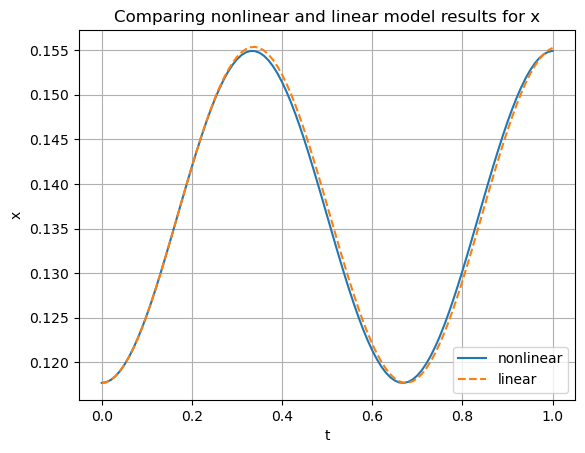

In [48]:
#Define nominal values
Fin_nom = 0
x_nom = 0.1177

#Let's simulate the response to a given input with the nominal position set as the initial position.
Fin = 40

#Define initial conditions
x_0 = x_nom
xlin_0 = 0
p_0 = 0


# Define vector of RHS for nonlinear case
def F(t, s):
    F = np.zeros(2)
    F[0] = s[1]/m
    F[1] = Fin + m*g - (k1*s[0] + k3*s[0]**3)
    return F


#Define State variable equations for linearized case
A = np.array([[0, 1/m], [-k1 - 3*k3*x_nom**2, 0]])
B = np.array([[0], [1]])


# Define vector of RHS of first order equations 
def Flin(t, s):
    Flin = np.dot(A, s) + np.dot(B, [Fin])  #Performs the matrix multiplication
    return Flin


#Define inputs for RK4 simulation
t = 0.0  # Start of integration
tf = 1  # End of integration
s = np.array([x_0, p_0])  # initial values for nonlinear case states
sl = np.array([xlin_0, p_0])  # initial values for linearized case states
dt = 0.01  # step size

#Use 4th order RK method to numerically solve
T, S = RK4(F, t, s, tf, dt)  #nonlinear case solution
Tl, Sl = RK4(Flin, t, sl, tf, dt)  #linearized case solution

#Adding the nominal value back into the solution for the linearized displacement.
xlin = x_nom + Sl[:, 0]

plt.plot(T, S[:, 0], '-', Tl, xlin, '--')
plt.grid(True)
plt.xlabel('t');
plt.ylabel('x')
plt.legend(('nonlinear', 'linear'), loc=4)
plt.title('Comparing nonlinear and linear model results for x')

plt.show()

The linearized solution matches the nonlinear solution fairly well in this loading condition.

---

Let's use the sympy library to compute the jacobian matrices in Python. 

In [50]:
#Define symbols for the state variables and input function
x, p, ff = sp.symbols('x p ff')

#Define the set of functions that make up the right hand side of the sv equations
fun_set = sp.Matrix([p/m, ff + m*g - (k1*x + k3*x**3)])

#Define a vector of state variables
state_variables = sp.Matrix([x, p])
Input_matrix = sp.Matrix([ff])

#Find the jacobian
AA_var = fun_set.jacobian(state_variables)
BB_var = fun_set.jacobian(Input_matrix)

#Substitute in the nominal values
AA = AA_var.subs(x, x_nom)
BB = BB_var.subs(x, x_nom)

#Convert the matrix into an array that can be used in numpy
AAn = np.array(AA).astype(np.float64)
BBn = np.array(BB).astype(np.float64)

#Print out the jacobian matrix computed by hand and the jacobian matrix computed in sympy
print('State jacobian computed by hand')
print(A)
print('State jacobian computed using sympy')
print(AAn)

print('Input jacobian computed by hand')
print(B)
print('Input jacobian computed using sympy')
print(BBn)

State jacobian computed by hand
[[ 0.00000000e+00  4.08163265e-02]
 [-2.12467961e+03  0.00000000e+00]]
State jacobian computed using sympy
[[ 0.00000000e+00  4.08163265e-02]
 [-2.12467961e+03  0.00000000e+00]]
Input jacobian computed by hand
[[0]
 [1]]
Input jacobian computed using sympy
[[0.]
 [1.]]


Both the state jacobian matrix and the input jacobian matrix match those found by hand.